# Projet numérique : équations différentielles

Nous étudions le "modèle proie-prédateur" suivant :
\begin{cases}
\dot{x_1} = x_1(\alpha - \beta x_2) \\
\dot{x_2} = -x_2(\gamma - \delta x_1) \\
\end{cases}

où $x_1 \geq 0$ est le nombre de proies, $x_2 \geq 0$ le nombre de prédateurs.\
$\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

En notant $x = (x_1,x_2)$, on réécrit le problème sous la forme $\dot{x} = f(x)$ (équation $E$), avec :
$$\begin{array}{ccccc}
f & : & \mathbb{R}^{2} & \to & \mathbb{R}^{2} \\
 & & x_1,x_2 & \mapsto & x_1(\alpha - \beta x_2),-x_2(\gamma - \delta x_1) \\
\end{array}$$

## Question 1

La variation du nombre de proies, ici $\dot{x_1}$, est la somme de deux contributions :\
$\bullet$ le terme $\alpha x_1$ représente la reproduction des proies. Plus elles sont nombreuses, plus elles vont se reproduire, d'où la proportionalité en $x_1$\
$\bullet$ le terme $-\beta x_1 x_2$ représente la prédation. Plus il y a de proies, plus les prédateurs pourront en trouver, d'où la proportionalité en $x_1$. Plus les prédateurs sont nombreux, plus les proies se feront manger, d'où la proportionalité en $x_2$

La variation du nombre de prédateurs, ici $\dot{x_2}$, est la somme de deux contributions :\
$\bullet$ le terme $-\gamma x_2$ représente la concurrence entre prédateurs, qui vont mourir. Plus ils sont nombreux, moins ils ont de nourriture chacun, d'où la proportionalité en $x_2$\
$\bullet$ le terme $\delta x_1 x_2$ représente la prédation et la reproduction. Plus il y a de proies, plus les prédateurs pourront en trouver, d'où la proportionalité en $x_1$. Plus les prédateurs sont nombreux, plus ils peuvent se reproduire, d'où la proportionalité en $x_2$

Les points d'équilibre sont les éléments $x \in \mathbb{R}^2$ tels que $f(x) = 0$.\
On en trouve deux : $(0,0)$ et $\bar{x} = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$

## Question 2

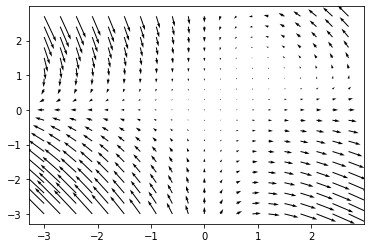

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
x1min    = -3.
x1max    = 3.
dx1      = 0.3
x1       = np.arange(x1min,x1max,dx1)
x2min    = -3.
x2max    = 3.
dx2      = 0.3
x2=np.arange(x2min,x2max,dx2)
XX1,XX2  = np.meshgrid(x1, x2)
U        = XX1*(1-XX2)
V        = -XX2*(1-XX1)
q=ax.quiver(XX1,XX2,U,V)
plt.show()

## Question 3

Les applications composantes de $f$ étant polynomiales, $f$ est continue et continûment différentiable sur $\mathbb{R}^2$.\
On peut donc appliquer le théorème de Cauchy-Lipschitz :\
Pour tout $t_0,x_0 \in \mathbb{R} \times \mathbb{R}^2$, il existe une unique solution maximale de $E$ telle que $x(t_0) = x_0$

Soit $t_0,x_0 \in \mathbb{R} \times \mathbb{R}_{>0}^2$. On note $x$ la solution donnée par le théorème de Cauchy-Lipschitz, avec ces conditions initiales.\
Montrons que $\forall t \in \mathbb{R}, x(t) \in \mathbb{R}_{>0}^2.$\
Par l'absurde : supposons qu'il existe $a \in \mathbb{R}$ tel que $x_1(a) \leq 0$ ou $x_2(a) \leq 0$\
Par continuité de $x_1$ et $x_2$, il existe $b \in \mathbb{R}$ tel que $x_1(b) = 0$ ou $x_2(b) = 0$\
On remarque que $x$ est aussi l'unique solution maximale de $E$ qui vaut $x(b)$ en $b$

$\bullet$ Cas 1 : $x_1(b) = 0$\
On pose : 
$$\begin{array}{ccccc}
y & : & \mathbb{R} & \to & \mathbb{R}^{2} \\
 & & t & \mapsto & 0,x_2(b)\exp(\gamma(b-t)) \\
\end{array}$$

$y$ est solution globale (donc maximale) de $E$, et vérifie $y(b) = x(b)$.\
D'après le théorème de Cauchy-Lipschitz, $x=y$.\
En particulier, $x(t_0) = x_0 = y(t_0) = (0,x_2(b)\exp(\gamma(b-t_0))$.\
Or $x_0 \in \mathbb{R}_{>0}^2$. Absurde.

$\bullet$ Cas 2 : $x_2(b) = 0$\
On pose :
$$\begin{array}{ccccc}
y & : & \mathbb{R} & \to & \mathbb{R}^{2} \\
 & & t & \mapsto & x_1(b)\exp(\alpha(t-b)),0 \\
\end{array}$$

La suite du raisonnement est identique au cas 1.

On aboutit à une absurdité dans les deux cas. Par conséquent, toute solution initialisée dans $\mathbb{R}_{>0}^2$ reste dans $\mathbb{R}_{>0}^2$ sur son domaine de définition.

## Question 4

Soit $x$ une solution initialisée dans $\mathbb{R}_{>0}^2$.\
$H$ est donc bien définie et dérivable sur $]0;\infty[$\
$\dot{H} = \delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac{\dot{x_2}}{x_2}$ or $x$ est solution de $E$ donc $\dot{x_1} = x_1(\alpha - \beta x_2)$ et $\dot{x_2} = -x_2(\gamma - \delta x_1)$\
On obtient $\dot{H} = 0$, $H$ est constante.\
On en déduit, d'après la forme de $H$, que $x$ est bornée.

Maintenant je pense qu'il faut utiliser le théorème du domaine maximal d'existence, mais je ne suis pas convaincu par cette démonstration :\
$x$ est définie sur $]t^-,t^+[$ avec $t^-,t^+ \in \mathbb{R} \cup \{+\infty,-\infty\}$.\
D'après le théorème du domaine maximal d'existence :\
$\bullet$ si $t^-$ est fini alors : $\lim\limits_{t \rightarrow t^-} d\left((t,x(t)),\partial(\mathbb{R}\times\mathbb{R}^2)\right)=0$ ou $\lim\limits_{t \rightarrow t^-} \lVert x(t) \rVert = +\infty$\
$\bullet$ si $t^+$ est fini alors : $\lim\limits_{t \rightarrow t^+} d\left((t,x(t)),\partial(\mathbb{R}\times\mathbb{R}^2)\right)=0$ ou $\lim\limits_{t \rightarrow t^+} \lVert x(t) \rVert = +\infty$\
Or puisque $x$ est bornée, les cas $\lim\limits_{t \rightarrow t^-} \lVert x(t) \rVert = +\infty$ et $\lim\limits_{t \rightarrow t^+} \lVert x(t) \rVert = +\infty$ sont impossibles.\
$\partial(\mathbb{R}\times\mathbb{R}^2) = \emptyset$ donc les deux autres cas sont aussi exclus ???

## Question 5

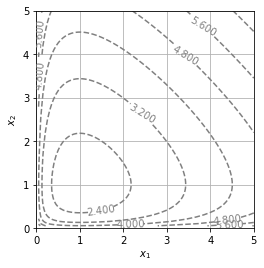

In [13]:
import matplotlib.pyplot as plt
import autograd
import autograd.numpy as np

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

alpha, beta, gamma, delta = 1, 1, 1, 1   
    
def H(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return delta * x1 - gamma * np.log(x1) + beta * x2 - alpha * np.log(x2)

display_contour(
    H, 
    x=np.linspace(0.0, 5.0, 100), 
    y=np.linspace(0.0, 5.0, 100), 
    levels=5 # 10 levels, automatically selected
)

On remarque que les courbes de niveau de $H$ sont fermées.\
Ceci confirme que les solutions $x$ de $E$ initialisées dans $\mathbb{R}_{>0}^2$ sont bornées.\
De plus, elles sont périodiques (argument supplémentaire ?).